In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/DecisionTreeAssignment

/content/drive/MyDrive/DecisionTreeAssignment


In [ ]:
ls

1.png                    DecisionTreeImplementation.ipynb  restaurant_test.csv
decision_tree_graph      restaurant.csv
decision_tree_graph.png  restaurant_predict.csv


In [ ]:

tree={}
featureToWorkOn=None

In [ ]:
import pydot
import uuid

def walk_dictionaryv2(graph, dictionary, parent_node=None):
    for k in dictionary.keys():

        if parent_node is not None:
            from_name = parent_node.get_name().replace("\"", "") + '_' + str(k)
            from_label = str(k)
            obj_dict = {}

            '''if 'True' in from_label:
                node_from = pydot.Node(from_name, color='white', style='filled', fillcolor='green', label=from_label)
            elif 'False' in from_label:
                node_from = pydot.Node(from_name, color='white', style='filled', fillcolor='red', label=from_label)
            else:'''
            node_from = pydot.Node(from_name, label=from_label)

            graph.add_node(node_from)

            # Set edge attributes for child nodes
            edge = pydot.Edge(parent_node, node_from, color='blue', style='dashed')
            graph.add_edge(edge)

            if isinstance(dictionary[k], dict):  # if interim node
                walk_dictionaryv2(graph, dictionary[k], node_from)
            else:  # if leaf node
                to_name = str(uuid.uuid4()) + '_' + str(dictionary[k])  # unique name
                to_label = str(dictionary[k])

                # Set leaf node color based on the value ('Yes' or 'No')
                if to_label == 'No':
                    node_to = pydot.Node(to_name, label=to_label, shape='box', color='orange', style='filled')
                elif to_label == 'Yes':
                    node_to = pydot.Node(to_name, label=to_label, shape='box', color='lightgreen', style='filled')


                graph.add_node(node_to)

                # Set edge attributes for leaf nodes
                edge = pydot.Edge(node_from, node_to, color='black', style='solid', arrowhead='none')
                graph.add_edge(edge)
        else:
            from_name = str(k)
            from_label = str(k)

            # Set root node attributes
            node_from = pydot.Node(from_name, label=from_label, color='purple', style='filled')
            walk_dictionaryv2(graph, dictionary[k], node_from)


def plot_tree(tree, name):
    graph = pydot.Dot(graph_type='graph')
    walk_dictionaryv2(graph, tree)
    graph.write_png(name + '.png')


In [ ]:
def strip_spaces(x):
    if isinstance(x, str):
        return x.strip()
    return x

In [ ]:
import pandas as pd
from io import StringIO

df = pd.read_csv('/content/drive/MyDrive/DecisionTreeAssignment/restaurant.csv')
df = df.applymap(strip_spaces)

In [ ]:
def f_entropy_output(data):
  Pyes = len(data.loc[data.Output == 'Yes']) / len(data)
  Pno = len(data.loc[data.Output == 'No']) / len(data)
  return -Pno * np.log2(Pno) - Pyes * np.log2(Pyes)

In [ ]:
def IG(data, column, ent_decision):
    IG_decision = ent_decision
    for name, temp in data.groupby(column):
        p_p = len(temp.loc[temp.Output == 'Yes']) / len(temp)
        p_n = len(temp.loc[temp.Output == 'No']) / len(temp)
        entropy_decision = 0

        if p_p != 0:
            entropy_decision -= (p_p) * np.log2(p_p)

        if p_n != 0:
            entropy_decision -= (p_n) * np.log2(p_n)

        IG_decision -= (len(temp) / len(data)) * entropy_decision
    return IG_decision

In [ ]:
def replace_nested_dict_value(dictionary, target_key, new_value):
    for key, value in dictionary.items():
        if key == target_key:
            dictionary[key] = new_value
        elif isinstance(value, dict):
            replace_nested_dict_value(value, target_key, new_value)

In [ ]:
def createTree(featureToWorkOn,max_info_feature,df_next):
    subtree={}
    subtree[max_info_feature]={}
    current_parent=featureToWorkOn

    for name, temp in df_next.groupby(max_info_feature):
        print('-' * 15)
        print(name)
        print('-' * 15)
        print(temp)
        print('-' * 15)
        num_unique_values = temp['Output'].nunique()
        print(f'Number of unique values of Output for {max_info_feature} when  value of {max_info_feature} is {name} ====>{num_unique_values}')
        if(num_unique_values==1):
          subtree[max_info_feature][name] = temp['Output'].iloc[0]
        else:
          featureToWorkOn=name
          subtree[max_info_feature][name]={}

    for name, temp in df.groupby(max_info_feature):
        print(name)
        if name not in (subtree[max_info_feature]):
            result = df_next['Output'].value_counts()

            # Find the maximum count
            max_count = result.max()

            # Filter the values with the maximum count
            values_with_max_count = result[result == max_count].index.tolist()
            print(values_with_max_count)
            # Check if 'YES' is one of the values with the maximum count
            if 'Yes' in values_with_max_count:
                max_value = 'Yes'
            else:
                max_value = values_with_max_count[0]

            print("Value with maximum instances:", max_value)

            subtree[max_info_feature][name]=max_value

    replace_nested_dict_value(tree, current_parent, subtree)
    return featureToWorkOn,max_info_feature

In [ ]:
entropy_decision=f_entropy_output(df)
print(entropy_decision)

1.0


In [ ]:
max_info_gain = -1
max_info_feature = None
for col in df.columns[:-1]:
    gain = IG(df, col,entropy_decision)
    print(f'Gain(Output, {col}) = {gain:0.4f}')
    if(gain>max_info_gain):
      max_info_gain=gain
      max_info_feature=col
print(f"Maximum information feature is {max_info_feature}")

Gain(Output, Alternate) = 0.0000
Gain(Output, Bar) = 0.0000
Gain(Output, Fri/Sat) = 0.0207
Gain(Output, Hungry) = 0.1957
Gain(Output, Patrons) = 0.5409
Gain(Output, Price) = 0.1957
Gain(Output, Raining) = 0.0000
Gain(Output, Reservation) = 0.0207
Gain(Output, Type) = 0.0000
Gain(Output, WaitEstimate) = 0.2075
Maximum information feature is Patrons


In [ ]:
tree[max_info_feature]={}


featureToWorkOn=None
for name, temp in df.groupby(max_info_feature):
    print('-' * 15)
    print(name)
    print('-' * 15)
    print(temp)
    print('-' * 15)
    num_unique_values = temp['Output'].nunique()
    print(f'Number of unique values of Output for {max_info_feature} when  value of {max_info_feature} is {name} ====>{num_unique_values}')
    if(num_unique_values==1):
      tree[max_info_feature][name] = temp['Output'].iloc[0]
    else:
      featureToWorkOn=name
      tree[max_info_feature][name]={}
current_parent=featureToWorkOn

---------------
Full
---------------
   Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation     Type  \
1        Yes   No      No    Yes    Full     $      No          No     Thai   
3        Yes   No     Yes    Yes    Full     $      No          No     Thai   
4        Yes   No     Yes     No    Full   $$$      No         Yes   French   
8         No  Yes     Yes     No    Full     $     Yes          No   Burger   
9        Yes  Yes     Yes    Yes    Full   $$$      No         Yes  Italian   
11       Yes  Yes     Yes    Yes    Full     $      No          No   Burger   

   WaitEstimate Output  
1         30-60     No  
3         10-30    Yes  
4           >60     No  
8           >60     No  
9         10-30     No  
11        30-60    Yes  
---------------
Number of unique values of Output for Patrons when  value of Patrons is Full ====>2
---------------
None
---------------
   Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation    Type  \
6         No  Yes  

In [ ]:
tree

{'Patrons': {'Full': {}, 'None': 'No', 'Some': 'Yes'}}

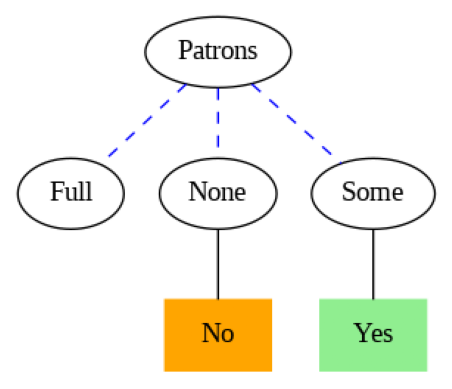

In [ ]:
plot_tree(tree,'1')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'image_filename.jpg' with the actual filename of your image.
image_filename = '/content/drive/MyDrive/DecisionTreeAssignment/1.png'

# Load the image using matplotlib.image
img = mpimg.imread(image_filename)

# Display the image using imshow
plt.imshow(img)
plt.axis('off')  # Turn off axis ticks and labels for a cleaner display
plt.show()

In [ ]:
df_next = df.loc[df.Patrons == featureToWorkOn ]
df_next

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Output
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No
11,Yes,Yes,Yes,Yes,Full,$,No,No,Burger,30-60,Yes


In [ ]:
entropy_decision = f_entropy_output(df_next)
entropy_decision=round(entropy_decision,4)
print(entropy_decision)

0.9183


In [ ]:
max_info_gain = -1
max_info_feature = None
for col in df_next.columns[:-1]:
    gain = IG(df_next, col,entropy_decision)
    gain = round(gain, 4)
    print(f'Gain(Output, {col}) = {gain}')
    if(gain>max_info_gain):
      max_info_gain=gain
      max_info_feature=col
print(f"Maximum information feature is {max_info_feature}")

Gain(Output, Alternate) = 0.1092
Gain(Output, Bar) = 0.0
Gain(Output, Fri/Sat) = 0.1092
Gain(Output, Hungry) = 0.2516
Gain(Output, Patrons) = 0.0
Gain(Output, Price) = 0.2516
Gain(Output, Raining) = 0.1092
Gain(Output, Reservation) = 0.2516
Gain(Output, Type) = 0.2516
Gain(Output, WaitEstimate) = 0.2516
Maximum information feature is Hungry


In [ ]:
featureToWorkOn,max_info_feature=createTree(featureToWorkOn,max_info_feature,df_next)

---------------
No
---------------
  Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation    Type  \
4       Yes   No     Yes     No    Full   $$$      No         Yes  French   
8        No  Yes     Yes     No    Full     $     Yes          No  Burger   

  WaitEstimate Output  
4          >60     No  
8          >60     No  
---------------
Number of unique values of Output for Hungry when  value of Hungry is No ====>1
---------------
Yes
---------------
   Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation     Type  \
1        Yes   No      No    Yes    Full     $      No          No     Thai   
3        Yes   No     Yes    Yes    Full     $      No          No     Thai   
9        Yes  Yes     Yes    Yes    Full   $$$      No         Yes  Italian   
11       Yes  Yes     Yes    Yes    Full     $      No          No   Burger   

   WaitEstimate Output  
1         30-60     No  
3         10-30    Yes  
9         10-30     No  
11        30-60    Yes  
--------

In [ ]:
tree

{'Patrons': {'Full': {'Hungry': {'No': 'No', 'Yes': {}}},
  'None': 'No',
  'Some': 'Yes'}}

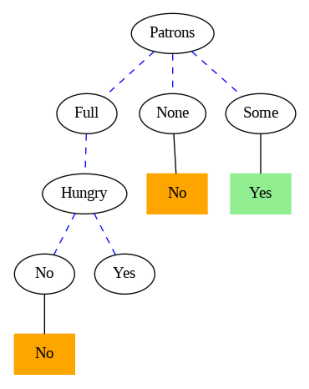

In [ ]:
plot_tree(tree,'1')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'image_filename.jpg' with the actual filename of your image.
image_filename = '/content/drive/MyDrive/DecisionTreeAssignment/1.png'

# Load the image using matplotlib.image
img = mpimg.imread(image_filename)

# Display the image using imshow
plt.imshow(img)
plt.axis('off')  # Turn off axis ticks and labels for a cleaner display
plt.show()

In [ ]:

df_next = df_next.loc[df_next.Hungry== featureToWorkOn ]
df_next

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Output
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No
11,Yes,Yes,Yes,Yes,Full,$,No,No,Burger,30-60,Yes


In [ ]:
entropy_decision = f_entropy_output(df_next)
entropy_decision

1.0

In [ ]:

max_info_gain = -1
max_info_feature = None
for col in df_next.columns[:-1]:
    gain = IG(df_next, col,entropy_decision)
    gain = round(gain, 4)
    print(f'Gain(Output, {col}) = {gain}')
    if(gain>max_info_gain):
      max_info_gain=gain
      max_info_feature=col
print(f"Maximum information feature is {max_info_feature}")

Gain(Output, Alternate) = 0.0
Gain(Output, Bar) = 0.0
Gain(Output, Fri/Sat) = 0.3113
Gain(Output, Hungry) = 0.0
Gain(Output, Patrons) = 0.0
Gain(Output, Price) = 0.3113
Gain(Output, Raining) = 0.0
Gain(Output, Reservation) = 0.3113
Gain(Output, Type) = 0.5
Gain(Output, WaitEstimate) = 0.0
Maximum information feature is Type


In [ ]:
featureToWorkOn,max_info_feature=createTree(featureToWorkOn,max_info_feature,df_next)

---------------
Burger
---------------
   Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation    Type  \
11       Yes  Yes     Yes    Yes    Full     $      No          No  Burger   

   WaitEstimate Output  
11        30-60    Yes  
---------------
Number of unique values of Output for Type when  value of Type is Burger ====>1
---------------
Italian
---------------
  Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation     Type  \
9       Yes  Yes     Yes    Yes    Full   $$$      No         Yes  Italian   

  WaitEstimate Output  
9        10-30     No  
---------------
Number of unique values of Output for Type when  value of Type is Italian ====>1
---------------
Thai
---------------
  Alternate Bar Fri/Sat Hungry Patrons Price Raining Reservation  Type  \
1       Yes  No      No    Yes    Full     $      No          No  Thai   
3       Yes  No     Yes    Yes    Full     $      No          No  Thai   

  WaitEstimate Output  
1        30-60     No  
3       

In [ ]:
tree

{'Patrons': {'Full': {'Hungry': {'No': 'No',
    'Yes': {'Type': {'Burger': 'Yes',
      'Italian': 'No',
      'Thai': {},
      'French': 'Yes'}}}},
  'None': 'No',
  'Some': 'Yes'}}

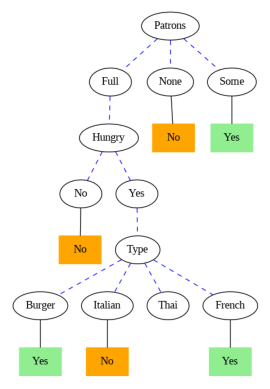

In [ ]:
plot_tree(tree,'1')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'image_filename.jpg' with the actual filename of your image.
image_filename = '/content/drive/MyDrive/DecisionTreeAssignment/1.png'

# Load the image using matplotlib.image
img = mpimg.imread(image_filename)

# Display the image using imshow
plt.imshow(img)
plt.axis('off')  # Turn off axis ticks and labels for a cleaner display
plt.show()

In [ ]:
df_next = df_next.loc[df_next.Type== featureToWorkOn ]
df_next

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Output
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes


In [ ]:
entropy_decision = f_entropy_output(df_next)
entropy_decision

1.0

In [ ]:
max_info_gain = -1
max_info_feature = None
for col in df_next.columns[:-1]:
    gain = IG(df_next, col,entropy_decision)
    gain = round(gain, 4)
    print(f'Gain(Output, {col}) = {gain}')
    if(gain>max_info_gain):
      max_info_gain=gain
      max_info_feature=col
print(f"Maximum information feature is {max_info_feature}")

Gain(Output, Alternate) = 0.0
Gain(Output, Bar) = 0.0
Gain(Output, Fri/Sat) = 1.0
Gain(Output, Hungry) = 0.0
Gain(Output, Patrons) = 0.0
Gain(Output, Price) = 0.0
Gain(Output, Raining) = 0.0
Gain(Output, Reservation) = 0.0
Gain(Output, Type) = 0.0
Gain(Output, WaitEstimate) = 1.0
Maximum information feature is Fri/Sat


In [ ]:
featureToWorkOn,max_info_feature=createTree(featureToWorkOn,max_info_feature,df_next)

---------------
No
---------------
  Alternate Bar Fri/Sat Hungry Patrons Price Raining Reservation  Type  \
1       Yes  No      No    Yes    Full     $      No          No  Thai   

  WaitEstimate Output  
1        30-60     No  
---------------
Number of unique values of Output for Fri/Sat when  value of Fri/Sat is No ====>1
---------------
Yes
---------------
  Alternate Bar Fri/Sat Hungry Patrons Price Raining Reservation  Type  \
3       Yes  No     Yes    Yes    Full     $      No          No  Thai   

  WaitEstimate Output  
3        10-30    Yes  
---------------
Number of unique values of Output for Fri/Sat when  value of Fri/Sat is Yes ====>1
No
Yes


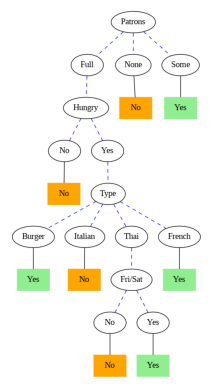

In [ ]:
plot_tree(tree,'1')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'image_filename.jpg' with the actual filename of your image.
image_filename = '/content/drive/MyDrive/DecisionTreeAssignment/1.png'

# Load the image using matplotlib.image
img = mpimg.imread(image_filename)

# Display the image using imshow
plt.imshow(img)
plt.axis('off')  # Turn off axis ticks and labels for a cleaner display
plt.show()

In [ ]:
df_test= pd.read_csv('/content/drive/MyDrive/DecisionTreeAssignment/restaurant_test.csv')
df_test = df_test.applymap(strip_spaces)

In [ ]:
df_test

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Output
0,No,No,No,No,None,$$$,No,No,Thai,0-10,No
1,No,No,Yes,Yes,Full,$,Yes,No,Burger,10-30,Yes
2,Yes,No,No,No,Full,$$,Yes,No,French,0-10,No


In [ ]:
def predict(tree, instance):
    if not isinstance(tree, dict): #if it is leaf node
        return tree #return the value
    else:
        root_node = next(iter(tree)) #getting first key/feature name of the dictionary
        feature_value = instance[root_node] #value of the feature
        if feature_value in tree[root_node]: #checking the feature value in current tree node
            return predict(tree[root_node][feature_value], instance) #goto next feature
        else:
            return None

In [ ]:
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows(): #for each row in the dataset
        result = predict(tree, test_data_m.iloc[index]) #predict the row
        if result == test_data_m[label].iloc[index]: #predicted value and expected value is same or not
            correct_preditct += 1 #increase correct count
        else:
            wrong_preditct += 1 #increase incorrect count
    accuracy = correct_preditct / (correct_preditct + wrong_preditct) #calculating accuracy
    return accuracy

In [ ]:
df_test

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,Output
0,No,No,No,No,None,$$$,No,No,Thai,0-10,No
1,No,No,Yes,Yes,Full,$,Yes,No,Burger,10-30,Yes
2,Yes,No,No,No,Full,$$,Yes,No,French,0-10,No


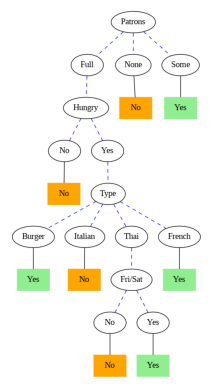

In [ ]:
plot_tree(tree,'1')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'image_filename.jpg' with the actual filename of your image.
image_filename = '/content/drive/MyDrive/DecisionTreeAssignment/1.png'

# Load the image using matplotlib.image
img = mpimg.imread(image_filename)

# Display the image using imshow
plt.imshow(img)
plt.axis('off')  # Turn off axis ticks and labels for a cleaner display
plt.show()

In [ ]:
selected_columns = ['Patrons', 'Hungry','Type','Fri/Sat','Output']
filtered_df_test = df_test[selected_columns]
print(filtered_df_test)
Accuracy=evaluate(tree,filtered_df_test,'Output')
print(f'Accuracy of model is {Accuracy*100} %')

  Patrons Hungry    Type Fri/Sat Output
0    None     No    Thai      No     No
1    Full    Yes  Burger     Yes    Yes
2    Full     No  French      No     No
Accuracy of model is 100.0 %


In [ ]:
df_predict= pd.read_csv('/content/drive/MyDrive/DecisionTreeAssignment/restaurant_predict.csv')
df_predict = df_test.applymap(strip_spaces)

In [ ]:
selected_columns = ['Patrons', 'Hungry','Type','Fri/Sat','Output']
filtered_df_predict = df_predict[selected_columns]
for index, row in filtered_df_predict.iterrows():
 print(f'Predicted value for row {index+1} ==> [{row}]  is ===================>',predict(tree, filtered_df_predict.iloc[index]))


Predicted value for row 1 ==> [Patrons    None
Hungry       No
Type       Thai
Fri/Sat      No
Output       No
Name: 0, dtype: object]  is ===================> No
Predicted value for row 2 ==> [Patrons      Full
Hungry        Yes
Type       Burger
Fri/Sat       Yes
Output        Yes
Name: 1, dtype: object]  is ===================> Yes
Predicted value for row 3 ==> [Patrons      Full
Hungry         No
Type       French
Fri/Sat        No
Output         No
Name: 2, dtype: object]  is ===================> No
